In [ ]:
# The code below produces a plot of the Continuous Hahn Poisson flow as described in the paper:
# "Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
# The program reads the file with pre-computed coefficients and produces an implicit plot, 
# i.e. it visualises the flow of the real roots when r varies. 
# Version 1.0, June 1, 2024. 

In [ ]:
#Continuous Hahn alternative coefficients precomputation 1/2,1,1/2,1
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,x):
    term1=(CCF(x/4).tanh()).pow(n)*(CCF(x/4).sech()).pow(2)
    integr=term1*Phi(x.abs(),80)
    return integr

def mpn(n,M):
    res= (n+1)*CCF.integral(lambda y, _: integrand(n,y), -M, M)
    return real_part(res)

def genmpcoeffs(N,M):
    f = open("ContHahncoeffa12b1c12d1dir", "w")
    for n in range(N):
        if n % 2:
            f.write(str("0"));f.write("\r\n")
        else:
            f.write(str(mpn(n,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genmpcoeffs(500,100)

In [ ]:
#Continuous Hahn alternative coefficients precomputation a,a,a,a
DRF=RealBallField(600)
CCF=ComplexBallField(600)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def hyp(n,a,x):
    p1=CCF(a)+CCF(n/2);p2=CCF(a)+CCF((n+1)/2);q1=CCF(2*a)+CCF(n)+CCF(1/2)
    z = (CCF(x/2).tanh()).pow(2)
    hyp=z.hypergeometric([p1,p2],[q1])
    return hyp

def integrand(n,a,x):
    term1=(CCF(x/2).tanh()).pow(n)
    term2=CCF(a*x).exp()/((CCF(x).exp()+1).pow(2*a))
    integr=term1*term2*hyp(n,a,x)*Phi(x.abs(),80)
    return integr

def mpn(n,a,M):
    pre1=CCF(-1).pow(n)*CCF(2).pow(2*a-n)*CCF(2*a+n).gamma()*CCF(4*a-1+n).gamma()*CCF(2*a-1/2).gamma()
    pre2=(n+1).gamma()*CCF(2*a-1/2+n).gamma()*CCF(2*a).gamma()*CCF(4*a-1).gamma()
    res= pre1/pre2*CCF.integral(lambda y, _: integrand(n,a,y), -M, M)
    return real_part(res)

def genmpcoeffs(N,M):
    f = open("ContHahncoeffa12b12c12d12dir", "w")
    for n in range(N):
        if n % 2:
            f.write(str("0"));f.write("\r\n")
        else:
            f.write(str(mpn(n,CCF("0.5"),M).mid()));f.write("\r\n")
    f.close() 
    return 0

genmpcoeffs(500,20)
#print(mpn(500,1/2,20))

Automated checks:
The sum of all the coefficients is   : 0.5000000000000000 = Xi(0.5i) = 0.5000000000000000 (should be equal).
d/dr z_3(0) via Newton approximation : -684.355665 versus formula: -683.045371 (should be close).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


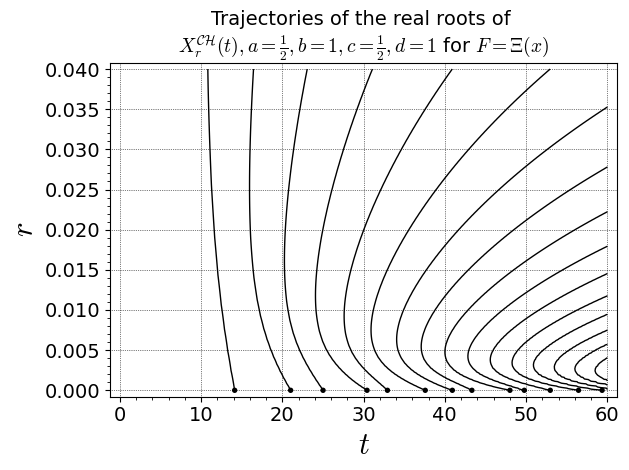

In [26]:
var("r","t");

#Generate a plot of all ordinates of the non-trivial zeros < 60 to overlay the flow graphs
var('y')
global ord, ordrho; ord = []; ordrho = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 60:
            ord.append([y,0])
        ordrho.append(y)
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1500)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContHahnCoeffa12b1c12d1dir", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1500)
def Xi(t):
    f=CCF("0.5",0)+I*CCF(t)
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(x,a,b,c,d,n):
    f1=n+a+b+c+d-1;f2=CCF(a,0)+I*CCF(x)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+c,a+d])
    return hyp

def ContHahnFlow(t,r):
    sum=CCF(0)
    for n in range(300):
        h = n+CCF("0.5")+CCF("1")+CCF("0.5")+CCF("1")-1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),CCF("1"),CCF("0.5"),CCF("1"),n)
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.0000000001");x0 = RDF(ordrho[k-1]);
    while(y):
        hd = (ContHahnFlow(x0 + tr*100,tr) - ContHahnFlow(x0,tr))/(tr*100)
        h = ContHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(ordrho[k-1]))/(tr) 
    return dzdr3

def B(x,c,d):
    return (c-I*x)*(d-I*x)

def D(x,a,b):
    return (a+I*x)*(b+I*x)

#sum zeros around k-th zero
def prodzeros(k,c):
    zk =ordrho[k-1]
    prod0 = 1
    for j in range(k-1):
        prod0 = prod0 * (1 + c/(zk-ordrho[j]))*(1 + c/(zk+ordrho[j]))
    prod1 = 1
    for j in range(k+1,100001):
        prod1 = prod1 * (1 + c/(zk-ordrho[j-1]))*(1 + c/(zk+ordrho[j-1]))
    prod2 = (1 + c/(zk + zk))
    return c * prod0 * prod1 * prod2       

#compute d/dr zk via formula
def verifyDDE(k):
    return B(ordrho[k-1],0.5,1)*prodzeros(k,I) + D(ordrho[k-1],0.5,1)*prodzeros(k,-I)

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xi(0.5i) = %3.16f (should be equal)." % (CoeffSum, ContHahnFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be close)." % (dzdrzk(3),verifyDDE(3)))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContHahnFlow(60,0)-Xi(60)))

a1=implicit_plot(lambda t,r:((RDF(ContHahnFlow(t,r)))),(t,0,60),(r,0,0.04),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CH}}_r(t), a=\frac{1}{2}, b=1, c=\frac{1}{2},d=1$ for $F=\Xi(x)$',gridlines=True,plot_points=150)
show(a1 + z,aspect_ratio='automatic')

0.0824130072263302, -1.0356323922499255
Automated checks:
The sum of all the coefficients is   : 1.0104492672326733 = Xin(0.5i) = 1.0104492672326733 (should be equal).
d/dr z_3(0) via Newton approximation : 19.644830 versus formula: 19.644830 (should be equal).
Ensure 20 digits accuracy at t = 60  : 0.00000000000000000000 (should show 20 zeros).


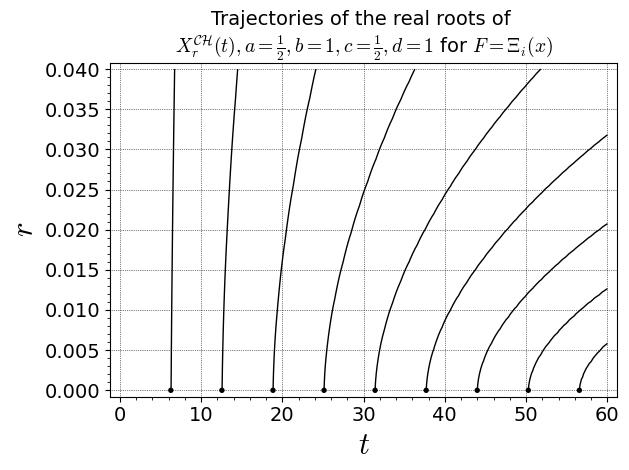

In [25]:
import math

var("r","t");

#Generate a plot of all ordinates of the zeros < 60 to overlay the flow graphs
var('y')
ord = []
for y in range(9):
    ord.append([2*pi()*(y+1),0])
z=list_plot(ord, size=15, marker="o", color = "black")

RDF=RealBallField(1024)
global m1; m1 = []; CoeffSum = RDF(0)
with open("ContHahnCoeffa12b1c12d1int", "r") as f:
    for row in f:
        CoeffSum = CoeffSum + RDF(row)
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def Xin(t):
    Xin=2*CCF(t/2).sin()/CCF(t)
    return Xin

def hyp(t,a,b,c,d,n):
    f1=n+a+b+c+d-1;f2=CCF(a,0)+I*CCF(t)
    hyp=CCF(1).hypergeometric([-n,f1,f2],[a+c,a+d])
    return hyp

def ContHahnFlow(t,r):
    sum=CCF(0)
    for n in range(201):
        h = n+CCF("0.5")+CCF("1")+CCF("0.5")+CCF("1")-1
        r1 = CCF(-r,0).exp()
        g = r1.pow(h)
        sum=sum+g.pow(n)*CCF(str(m1[n]))*hyp(t,CCF("0.5"),CCF("1"),CCF("0.5"),CCF("1"),n)
    return real_part(sum)

#compute d/dr zk Newton approximation
def dzdrzk(k):
    tr = RDF("0.00000000001");x0 = RDF(2*k*pi());
    while(y):
        hd = (ContHahnFlow(x0 + tr*100,tr) - ContHahnFlow(x0,tr))/(tr*100)
        h = ContHahnFlow(x0,tr)/hd ;x1 = x0 - h;ab = h.abs();x0 = x1
        if ab < tr:
            break
    dzdr3 = (x1 - RDF(2*pi()*k))/(tr) 
    return dzdr3

def B(x,c,d):
    return (c-I*x)*(d-I*x)

def D(x,a,b):
    return (a+I*x)*(b+I*x)

#closed form for sum of zeros around k-th zero
def ZS(k,c):
    zk =2*pi()*k
    return (-1)^k*zk*c^4*sin(pi()*k+c/2)/(pi()*k+c/2)     

#compute d/dr zk via formula
def verifyDDE(k):
    return B(2*pi()*k,0.5,1)*ZS(k,I) + D(2*pi()*k,0.5,1)*ZS(k,-I)

print("%3.16f, %3.16f" % (real_part(ZS(2,I)),imag_part(ZS(2,-I))))

print("Automated checks:")
print("The sum of all the coefficients is   : %3.16f = Xin(0.5i) = %3.16f (should be equal)." % (CoeffSum, ContHahnFlow(0.5*I,0)))
print("d/dr z_3(0) via Newton approximation : %3.6f versus formula: %3.6f (should be equal)." % (dzdrzk(3),real_part(verifyDDE(3))))
print("Ensure 20 digits accuracy at t = 60  : %3.20f (should show 20 zeros)." % real_part(ContHahnFlow(60,0)-Xin(60)))

a1i=implicit_plot(lambda t,r:((RDF(ContHahnFlow(t,r)))),(t,0,60),(r,0,0.04),color='black',fontsize=14,linestyle ="-",linewidth=1,axes_labels=['$t$','$r$'],title='Trajectories of the real roots of \n' +r'$X^{\mathcal{CH}}_r(t), a=\frac{1}{2}, b=1, c=\frac{1}{2},d=1$ for $F=\Xi_i(x)$',gridlines=True,plot_points=60)
show(a1i + z,aspect_ratio='automatic')